# Step - 1 - Introduction

* We can see that the input variables are a mixture of numerical and categorical or ordinal data types, where the non-numerical columns are represented using strings.  
* We can also see that the target variable is represented using strings. This column will need to be label encoded with 0 for the majority class and 1 for the minority class, as is the custom for binary imbalanced classification tasks.

# Step - 2 - Imputation and performing basic pandas operations.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("D:/DataSets/adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
df.shape

(48842, 15)

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [19]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
# drop rows with missing

df = df.dropna()

In [21]:
df.shape

(48842, 15)

In [22]:
# summarize the class distribution
from collections import Counter
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=37155, Percentage=76.072%
Class=>50K, Count=11687, Percentage=23.928%


In [24]:
# select columns with numerical data types

num_ix = df.select_dtypes(include=['int64', 'float64']).columns
num_ix

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

# Step - 3 - Univariate Analysis

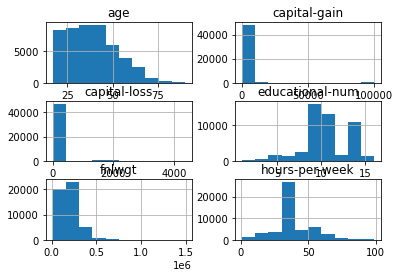

In [38]:
# select a subset of the dataframe with the chosen columns
subset = df[num_ix]
# create a histogram plot of each numeric variable
subset.hist()
plt.show()

* We can see many different distributions, some with Gaussian-like distributions, others with seemingly exponential or discrete distributions. We can also see that they all appear to have a very different scale.  


Observations from the above Plots  

* The average age is between 25-50  
* Max hours-per-week is around 30  
* Max capital-loss is around 45000
* Average educational-num is around 8 to 12  




# Step - 4 - Bivariate Analysis

<Figure size 432x288 with 0 Axes>

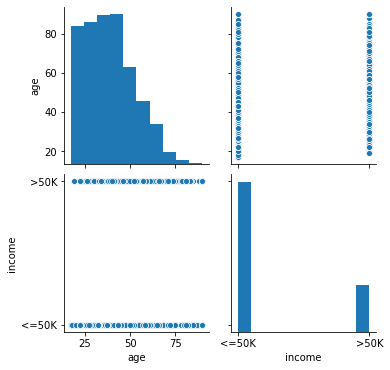

In [42]:
plt.figure()
sns.pairplot(df, vars=['age', 'income'])
plt.show()

Positive correlation between age and income.

<Figure size 432x288 with 0 Axes>

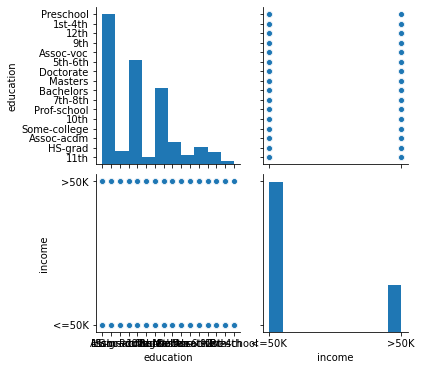

In [45]:
plt.figure()
sns.pairplot(df, vars=['education', 'income'])
plt.show()

Positive correlation between education and income.

<Figure size 432x288 with 0 Axes>

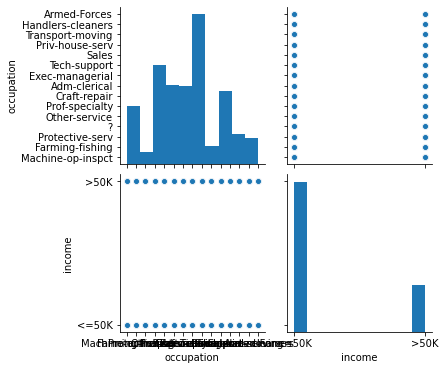

In [53]:
plt.figure()
sns.pairplot(df, vars=['occupation', 'income'])
plt.show()

Positive correlation between occupation and income.

<Figure size 432x288 with 0 Axes>

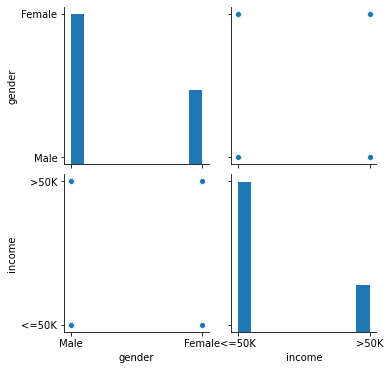

In [55]:
plt.figure()
sns.pairplot(df, vars=['gender', 'income'])
plt.show()

Negative correlation between gender and income.

<Figure size 432x288 with 0 Axes>

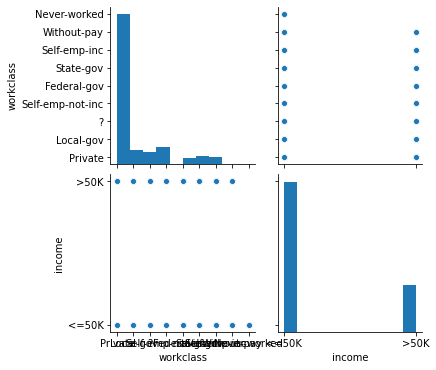

In [54]:
plt.figure()
sns.pairplot(df, vars=['workclass', 'income'])
plt.show()

Positive correlation between workclass and income.

# Step - 5 - Detecting and handling outliers

In [65]:
# Outlier detection using  Z-SCORE METHOD

def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['age'])

Outliers: [79, 77, 80, 75, 90, 79, 80, 77, 81, 78, 82, 83, 75, 75, 81, 85, 77, 76, 78, 77, 75, 76, 80, 77, 76, 90, 76, 81, 77, 77, 77, 75, 75, 76, 76, 76, 77, 84, 81, 89, 77, 77, 77, 75, 77, 76, 78, 76, 77, 75, 81, 77, 83, 81, 76, 82, 80, 90, 81, 77, 83, 80, 75, 90, 90, 84, 78, 80, 76, 77, 78, 76, 75, 75, 80, 75, 80, 76, 75, 81, 90, 76, 76, 77, 78, 85, 90, 81, 81, 80, 80, 77, 78, 79, 75, 81, 75, 80, 88, 87, 77, 76, 90, 78, 76, 77, 79, 83, 79, 75, 80, 90, 79, 75, 79, 81, 78, 75, 81, 76, 75, 90, 76, 76, 82, 77, 76, 77, 75, 78, 75, 90, 87, 75, 81, 88, 75, 80, 81, 80, 81, 78, 76, 77, 90, 88, 75, 77, 89, 75, 75, 75, 84, 80, 80, 76, 83, 79, 81, 79, 76, 90, 75, 77, 76, 80, 81, 78, 76, 90, 88, 75, 76, 75, 90, 77, 75, 75, 90, 75, 76, 77, 78, 80, 90, 81, 75, 75, 82, 76, 79, 81, 76, 75, 80, 75, 83, 77, 90, 90, 76, 75, 77, 79, 76, 81, 75, 76, 90, 76, 76, 90, 80, 77, 90, 90, 78, 76, 76, 78, 79, 78, 79, 84, 90, 77, 75, 80, 75, 77, 90, 75, 81, 83, 84, 81, 79, 76, 85, 82, 78, 75, 79, 77, 80, 90, 76, 9

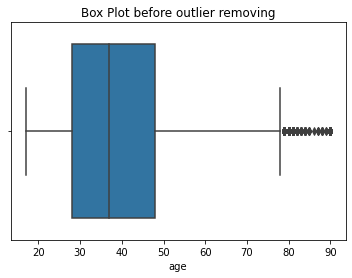

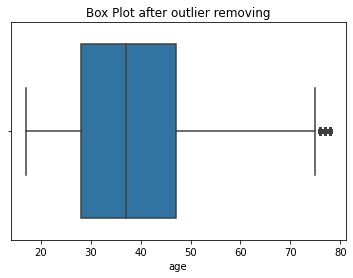

In [67]:
# Handling Outliers

df= pd.read_csv('D:/DataSets/adult.csv')
sns.boxplot(df['age'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'age')
sns.boxplot(df['age'])
plt.title("Box Plot after outlier removing")
plt.show()


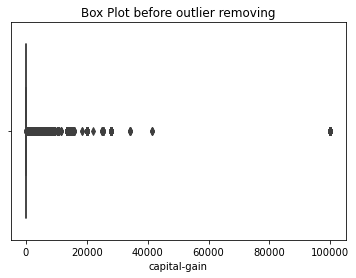

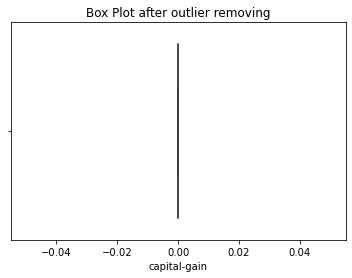

In [70]:
df= pd.read_csv('D:/DataSets/adult.csv')
sns.boxplot(df['capital-gain'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'capital-gain')
sns.boxplot(df['capital-gain'])
plt.title("Box Plot after outlier removing")
plt.show()

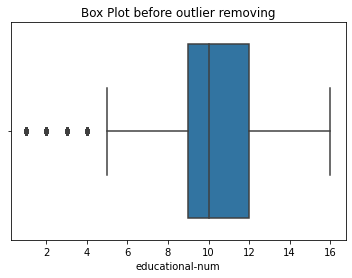

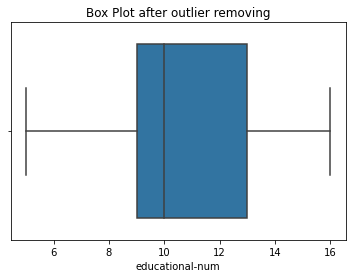

In [71]:
df= pd.read_csv('D:/DataSets/adult.csv')
sns.boxplot(df['educational-num'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'educational-num')
sns.boxplot(df['educational-num'])
plt.title("Box Plot after outlier removing")
plt.show()

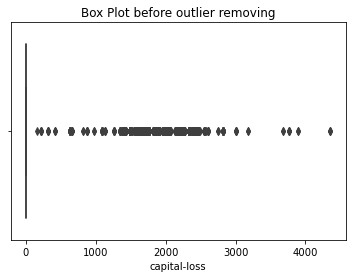

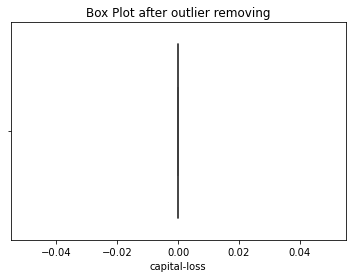

In [72]:
df= pd.read_csv('D:/DataSets/adult.csv')
sns.boxplot(df['capital-loss'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'capital-loss')
sns.boxplot(df['capital-loss'])
plt.title("Box Plot after outlier removing")
plt.show()

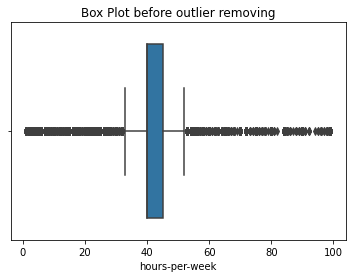

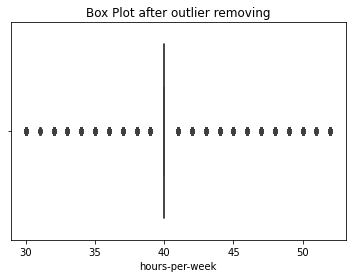

In [73]:
df= pd.read_csv('D:/DataSets/adult.csv')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'hours-per-week')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after outlier removing")
plt.show()

# Step - 6 - Conclusion of EDA

* The average age is between 25-50  
* Max hours-per-week is around 30  
* Max capital-loss is around 45000
* Average educational-num is around 8 to 12  

# Step - 7 - Perform feature transformation

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [77]:
df["workclass"]=le.fit_transform(df["workclass"])
df["education"]=le.fit_transform(df["education"])
df["marital-status"]=le.fit_transform(df["marital-status"])
df["occupation"]=le.fit_transform(df["occupation"])
df["relationship"]=le.fit_transform(df["relationship"])
df["race"]=le.fit_transform(df["race"])
df["gender"]=le.fit_transform(df["gender"])
df["native-country"]=le.fit_transform(df["native-country"])
df["income"]=le.fit_transform(df["income"])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37481 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              37481 non-null  int64
 1   workclass        37481 non-null  int32
 2   fnlwgt           37481 non-null  int64
 3   education        37481 non-null  int32
 4   educational-num  37481 non-null  int64
 5   marital-status   37481 non-null  int32
 6   occupation       37481 non-null  int32
 7   relationship     37481 non-null  int32
 8   race             37481 non-null  int32
 9   gender           37481 non-null  int32
 10  capital-gain     37481 non-null  int64
 11  capital-loss     37481 non-null  int64
 12  hours-per-week   37481 non-null  int64
 13  native-country   37481 non-null  int32
 14  income           37481 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 4.5 MB


In [80]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Step - 8 - Build various Machine Learning models considering ‘income’ as target variable.

In [84]:
x=df.iloc[:,:-1]
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,22,4,310152,15,10,4,11,1,4,1,0,0,40,39
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39


In [86]:
y=df["income"]
y

0        0
1        0
2        1
3        1
4        0
        ..
48836    0
48837    0
48838    1
48839    0
48841    1
Name: income, Length: 37481, dtype: int32

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr=LogisticRegression()

In [95]:
lr.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred=lr.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [98]:
print("Accuracy Score using Logistic Regression is", accuracy_score(y_test,y_pred))

Accuracy Score using Logistic Regression is 0.7947178871548619


In [99]:
confusion_matrix(y_test,y_pred)

array([[5503,  187],
       [1352,  455]], dtype=int64)

# Decision Tree

In [100]:
from sklearn import tree

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [101]:
tree_model=tree.DecisionTreeClassifier(criterion='gini')

In [102]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred=tree_model.predict(x_test)

In [104]:
print("Accuracy score is",accuracy_score(y_test,y_pred))

Accuracy score is 0.8117913832199547


# KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn=KNeighborsClassifier(n_neighbors=4)

In [107]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [108]:
y_pred=knn.predict(x_test)

In [109]:
print("Accuracy score is",accuracy_score(y_test,y_pred))

Accuracy score is 0.7883153261304522


# Step - 9- Performance of each model

## Accuracy score of Logistic Regression is 0.7947178871548619
## Accuracy score of Decision tree is 0.8117913832199547
## Accuracy score of KNN is 0.7883153261304522